# **Market Basket Analysis in Python using Apriori Algorithm**

In [2]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=a4d4169012fcb3d02e6c1ddb20548ef8ca74cf96a15dfa978330c0417ad3fe9a
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


**Importing libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Importing dataset**

In [4]:
df = pd.read_csv("Groceriesdata.csv")

In [5]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,01-05-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,02-01-2015,whole milk
...,...,...,...
38760,4471,10-08-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,12-03-2014,fruit/vegetable juice


In [6]:
df.shape

(38765, 3)

In [8]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB



**Preprocessing on Data**

In [10]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [11]:
#setting index as Date
df.set_index('Date',inplace = True)
df

,Member_number,itemDescription
Date,,
21-07-2015,1808,tropical fruit
01-05-2015,2552,whole milk
19-09-2015,2300,pip fruit
12-12-2015,1187,other vegetables
02-01-2015,3037,whole milk
...,...,...
10-08-2014,4471,sliced cheese
23-02-2014,2022,candy
16-04-2014,1097,cake bar


In [12]:
#converting date into a particular format
df.index=pd.to_datetime(df.index)
df

<ipython-input-12-6021996550e1>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.index=pd.to_datetime(df.index)


,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-01-05,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-02-01,3037,whole milk
...,...,...
2014-10-08,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


In [13]:
#gathering information about products
total_item = len(df)
total_days = len(np.unique(df.index.date))
total_months = len(np.unique(df.index.year))
print(total_item,total_days,total_months)

38765 728 2


Total items sold = 38765

Total days = 728

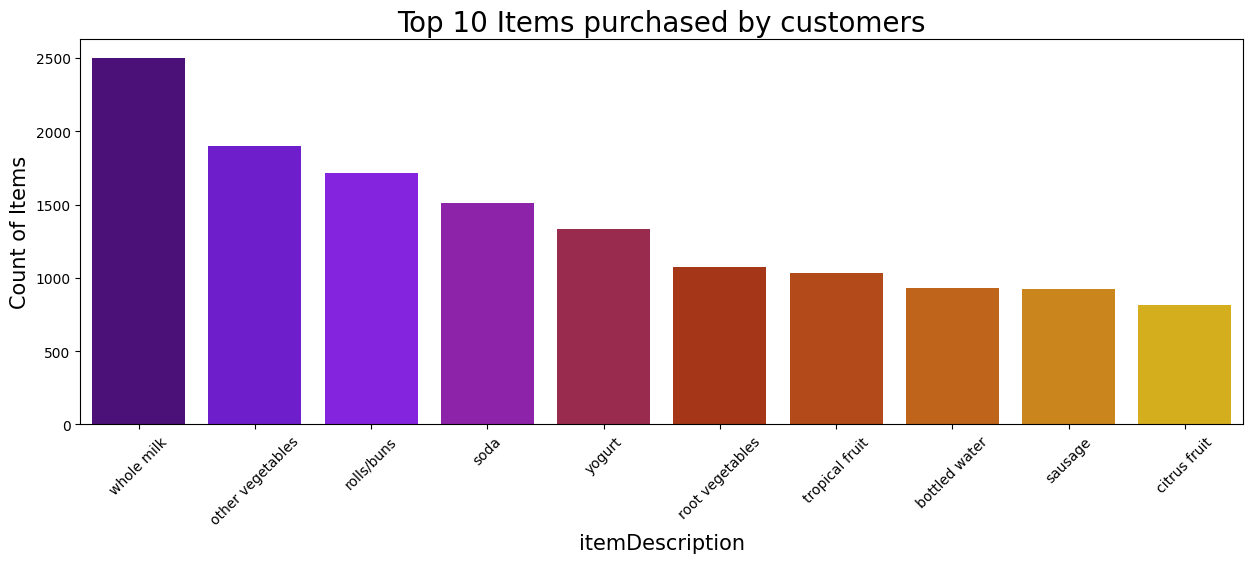

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.itemDescription.value_counts().head(10).index, y = df.itemDescription.value_counts().head(10).values, palette = 'gnuplot')
plt.xlabel('itemDescription', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 10 Items purchased by customers', color = 'black', size = 20)
plt.show()

Here we need a data in form of list for Apriori Algorithm.

In [15]:
#grouping dataset to form a list of products bought by same customer on same date
df=df.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))

In [16]:
#apriori takes list as an input, hence converting dtaset to a list
orders = df.values.tolist()
orders[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd']]

# **Apriori Algorithm Implementation**

In [17]:
#applying apriori
from apyori import apriori
rules = apriori(orders, min_support=0.00030,min_confidence = 0.05,min_lift = 2,min_length = 2)
results = list(rules)


Number of relations

In [18]:
print("There are {} Relation derived.".format(len(results)))

There are 104 Relation derived.


Association Rules Derived



In [19]:
for i in range(0, len(results)):
    print(results[i][0])

frozenset({'artif. sweetener', 'soda'})
frozenset({'condensed milk', 'berries'})
frozenset({'brandy', 'whole milk'})
frozenset({'butter', 'sweet spreads'})
frozenset({'liver loaf', 'canned beer'})
frozenset({'frozen fish', 'chocolate'})
frozenset({'citrus fruit', 'sauces'})
frozenset({'curd', 'cling film/bags'})
frozenset({'condensed milk', 'waffles'})
frozenset({'mustard', 'frankfurter'})
frozenset({'liver loaf', 'fruit/vegetable juice'})
frozenset({'pickled vegetables', 'ham'})
frozenset({'hamburger meat', 'pasta'})
frozenset({'hamburger meat', 'soft cheese'})
frozenset({'hamburger meat', 'spread cheese'})
frozenset({'roll products ', 'meat'})
frozenset({'meat spreads', 'sausage'})
frozenset({'salt', 'misc. beverages'})
frozenset({'spread cheese', 'misc. beverages'})
frozenset({'mustard', 'white bread'})
frozenset({'pip fruit', 'sweet spreads'})
frozenset({'pork', 'popcorn'})
frozenset({'sausage', 'rum'})
frozenset({'sausage', 'spices'})
frozenset({'seasonal products', 'soups'})
froz

Rules Generated

In [20]:
for item in results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # second index of the inner list
    print("Support: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: artif. sweetener -> soda
Support: 0.00046782062420637575
Confidence: 0.2413793103448276
Lift: 2.4857251346797353
Rule: condensed milk -> berries
Support: 0.0003341575887188398
Confidence: 0.05102040816326531
Lift: 2.34177413296607
Rule: brandy -> whole milk
Support: 0.0008688097306689834
Confidence: 0.34210526315789475
Lift: 2.1662805978127717
Rule: butter -> sweet spreads
Support: 0.0003341575887188398
Confidence: 0.07352941176470588
Lift: 2.087705101015738
Rule: liver loaf -> canned beer
Support: 0.00040098910646260775
Confidence: 0.12
Lift: 2.5577777777777775
Rule: frozen fish -> chocolate
Support: 0.00040098910646260775
Confidence: 0.058823529411764705
Lift: 2.493417763706049
Rule: citrus fruit -> sauces
Support: 0.0003341575887188398
Confidence: 0.11363636363636365
Lift: 2.1387935963407663
Rule: curd -> cling film/bags
Support: 0.0003341575887188398
Confidence: 0.06756756756756757
Lift: 2.005979193479194
Rule: condensed milk -> waffles
Support: 0.0003341575887188398
Confiden

In [21]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
ordered_results = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])
ordered_results

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,artif. sweetener,soda,0.000468,0.241379,2.485725
1,condensed milk,berries,0.000334,0.051020,2.341774
2,brandy,whole milk,0.000869,0.342105,2.166281
3,sweet spreads,butter,0.000334,0.073529,2.087705
4,liver loaf,canned beer,0.000401,0.120000,2.557778
...,...,...,...,...,...
99,whipped/sour cream,yogurt,0.000601,0.204545,2.381800
100,sausage,yogurt,0.000401,0.206897,2.409178
101,whole milk,sausage,0.001470,0.131737,2.182917
102,pastry,soda,0.000334,0.090909,7.817659
